In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import matplotlib.pyplot as plt

# load dataset 8

In [2]:
df = pd.read_csv('8_origination_charges.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88058 entries, 0 to 88057
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   census_tract                              88024 non-null  float64
 1   action_taken                              88058 non-null  int64  
 2   loan_type                                 88058 non-null  int64  
 3   lien_status                               88058 non-null  int64  
 4   reverse_mortgage                          88058 non-null  int64  
 5   open_end_line_of_credit                   88058 non-null  int64  
 6   loan_amount                               88058 non-null  int64  
 7   combined_loan_to_value_ratio              66925 non-null  float64
 8   interest_rate                             88058 non-null  object 
 9   total_loan_costs                          56714 non-null  float64
 10  origination_charges               

In [4]:
# Select object (string) and category columns from your DataFrame
object_category_columns = df.select_dtypes(include=['object', 'category'])

# Print the names of the selected columns
print(object_category_columns.columns)


Index(['interest_rate', 'loan_term', 'property_value', 'debt_to_income_ratio'], dtype='object')


In [5]:
print(df['loan_term'].value_counts())

loan_term
360    72295
180     9949
240     3634
120     1139
300      263
       ...  
162        1
166        1
296        1
320        1
290        1
Name: count, Length: 87, dtype: int64


Description: The number of months after which the legal obligation will mature or terminate, or would have matured or terminated

In [6]:
unique_categories = df['loan_term'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 87


In [7]:
# First, convert the 'loan_term ' column to numeric (float)
df['loan_term'] = pd.to_numeric(df['loan_term'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['loan_term'].min()
maximum_interest_rate = df['loan_term'].max()
median_interest_rate = df['loan_term'].median()

print("Minimum loan_term :", minimum_interest_rate)
print("Maximum loan_term :", maximum_interest_rate)
print("Median loan_term :", median_interest_rate)

Minimum loan_term : 24.0
Maximum loan_term : 480.0
Median loan_term : 360.0


# Check outliers

In [8]:
# Convert the 'loan_term ' column to numeric (float)
df['loan_term'] = pd.to_numeric(df['loan_term'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Calculate the quantiles
Q1 = df['loan_term'].quantile(0.25)
Q3 = df['loan_term'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['loan_term'] < lower_bound) | (df['loan_term'] > upper_bound)]

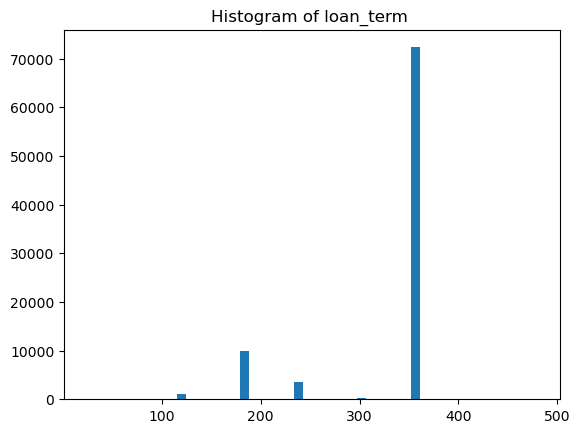

In [9]:
plt.hist(df['loan_term'], bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of loan_term ')
plt.show()

[180. 360. 120. 300. 240.  nan 336. 288. 348. 312. 216. 156. 480. 168.
 324. 144. 264. 228.  96. 321. 132. 204. 276.  36.  84. 108.  60. 369.
 121. 330. 354. 142. 235. 355. 150. 179. 298. 334. 344. 356. 352. 331.
 351. 350. 359. 347. 318.  24. 192. 366. 317. 346. 311. 345. 295. 308.
 275. 353. 162. 166. 181. 296. 320. 349. 299. 174. 222. 302. 170. 252.
 184. 219. 206. 145. 282. 337. 341. 175. 280. 322. 314. 194. 358. 160.
 238. 338. 290.]
165


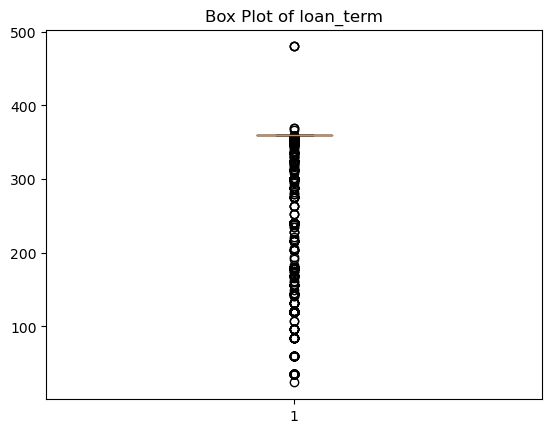

In [10]:
df1 = df.copy()
df1['loan_term'] = pd.to_numeric(df['loan_term'], errors='coerce')
df1 = df1.dropna(subset=['loan_term'])

print(df['loan_term'].unique())
print(df['loan_term'].isna().sum())

# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['loan_term'])
plt.title('Box Plot of loan_term')
plt.show()

## The outliers make the data into a line.
We can draw a boxplot without the outliers.

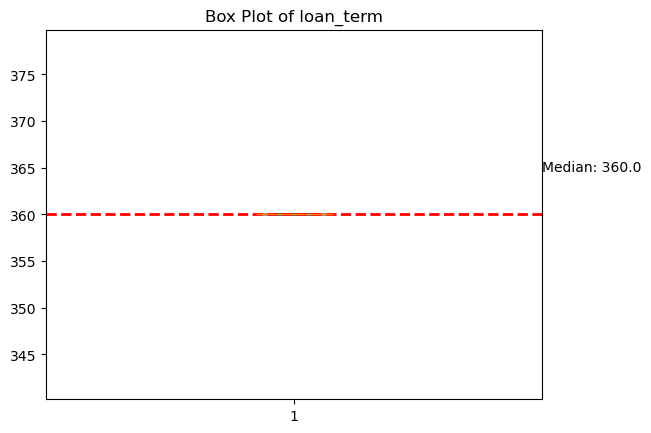

In [11]:
# Create a box plot of the 'loan_term ' column
plt.boxplot(df1['loan_term'], showfliers=False)  # Exclude outliers
plt.title('Box Plot of loan_term')

# Calculate the median value
median_value = df1['loan_term'].median()

# Add a median line
plt.axhline(median_value, color='r', linestyle='dashed', linewidth=2)

# Add text with the median value 5 pixels above the line
plt.text(1.5, median_value + 5, f'Median: {median_value}', va='center')

plt.show()


# Conclusion

removing outæiers might not be a good idea.

# Remove outliers?

In [12]:
# Calculate the IQR for loan_term 
Q1 = df1['loan_term'].quantile(0.15)
Q3 = df1['loan_term'].quantile(0.85)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outliers_mask = (df1['loan_term'] < lower_bound) | (df1['loan_term'] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = df1[~outliers_mask]

# Display the number of removed outliers
print(f'Number of removed outliers: {outliers_mask.sum()}')

Number of removed outliers: 70


In [13]:
# Create a DataFrame of removed outliers
outliers_df = df1[outliers_mask]

In [14]:
# Display the values of the removed outliers
print(outliers_df['loan_term'])

4850     36.0
4920     36.0
4976     36.0
5092     36.0
5208     36.0
         ... 
50470    36.0
54949    36.0
57717    36.0
72775    36.0
77772    36.0
Name: loan_term, Length: 70, dtype: float64


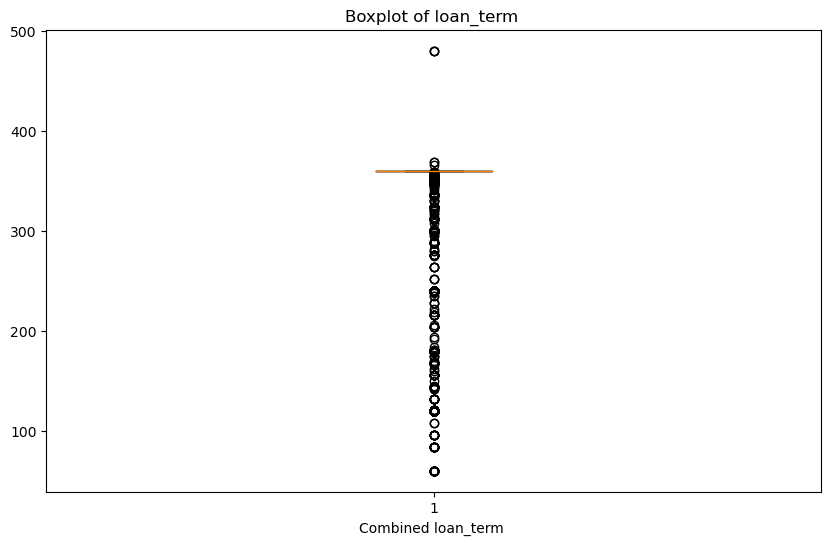

In [15]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['loan_term'])
plt.title('Boxplot of loan_term ')
plt.xlabel('Combined loan_term ')
plt.show()

We dont remove the outliers.

In [16]:
print(df1['loan_term'].value_counts())

loan_term
360.0    72295
180.0     9949
240.0     3634
120.0     1139
300.0      263
         ...  
275.0        1
162.0        1
296.0        1
320.0        1
290.0        1
Name: count, Length: 86, dtype: int64


# Make range categories

In [17]:
missing_values = df1['loan_term'].isna()
missing_values_count = missing_values.sum()
print(f"Number of missing values in 'loan_term': {missing_values_count}")

Number of missing values in 'loan_term': 0


In [21]:
new_df = df1.copy()

# Define custom categories based on the provided values
categories = {
    '1-2 years': (12, 24),   # 1-2 years
    '2-6 years': (24, 72),   # 2-6 years
    '7-11 years': (72, 132),  # 7-11 years
    '12-16 years': (132, 192),  # 12-16 years
    '17-21 years': (192, 252),  # 17-21 years
    '22-26 years': (252, 312),  # 22-26 years
    '27-31 years': (312, 372),  # 27-31 years
    '32-36 years': (372, 432),  # 32-36 years
    '37-41 years': (432, 492),  # 37-41 years
    '42-46 years': (492, 552),  # 42-46 years
}

# Create an empty list to store 'loan_term' values categorized as 'Other'
other_category_values = []

# Define a function to categorize 'loan_term' into the desired ranges
def categorize_loan_term(term):
    try:
        term = int(term)  # Convert to integer
    except (ValueError, TypeError):
        other_category_values.append(term)  # Add non-integer values to the list
        return 'Other'

    for category, (start, end) in categories.items():
        if start <= term <= end:
            return category
    other_category_values.append(term)  # Add 'loan_term' value to the list
    return 'Other'

# Apply the categorization function to the 'loan_term' column in the original DataFrame
df1['loan_term'] = df1['loan_term'].apply(categorize_loan_term)

# Print the result
print(df1['loan_term'].value_counts())

# Print the 'loan_term' values in the 'Other' category
print("Values in 'Other' category:", other_category_values)



loan_term
27-31 years    72566
12-16 years    10040
17-21 years     3664
7-11 years      1188
22-26 years      327
2-6 years        104
37-41 years        3
1-2 years          1
Name: count, dtype: int64
Values in 'Other' category: []


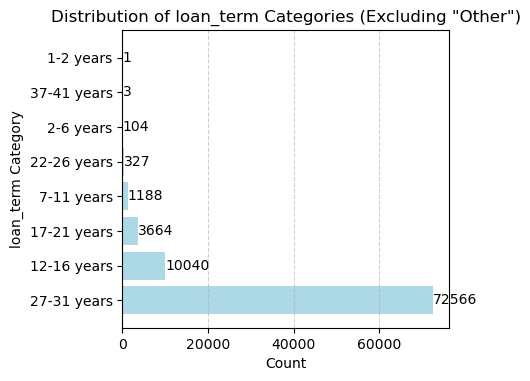

In [28]:
# Filter the DataFrame to exclude the 'Other' category
filtered_df = df1[df1['loan_term'] != 'Other']

# Get the value counts for the filtered DataFrame
value_counts = filtered_df['loan_term'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(6, 5))  # Increase the figure size
plt.barh(value_counts.index, value_counts.values, color='lightblue')
plt.xlabel('Count')
plt.ylabel('loan_term Category')
plt.title('Distribution of loan_term Categories (Excluding "Other")')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add a grid

# Display the counts on the right of the bars with some spacing
for i, count in enumerate(value_counts.values):
    plt.text(count + 8, i, str(count), va='center')

plt.tight_layout(pad=5)  # Adjust padding
plt.show()


In [20]:
df1.to_csv('9_loan_term .csv', index=False)